In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
# linear algebra
import numpy as np 
# data processing
import pandas as pd 
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
# algoritmos
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#train_df.info()
#train_df.describe()

def limpiar(df):
    del(df['OBJECTID'])
    del(df['Site_Code'])
    del(df['Date'])
    del(df['Time'])
    del(df['Primary_Basin'])
    del(df['Station_Name'])
    del(df['RWB_ID_RBP2'])
    del(df['X'])
    del(df['Y'])
    del(df['Site_Status_21Oct2020'])
    del(df['Depth'])
    del(df['GlobalID'])
    #df.describe()
    #muchos valores nulos
    del(df['CUSOL2_UGL'])
    del(df['FESOL1_UGL'])
    del(df['ZN_SOL_UGL'])
    df = df.fillna(0)
    #eliminar registro duplicados
    df = df.drop_duplicates()
    df['agua'] = np.where((df['ALK_MGL']>= 10.0) & (df['BOD_MGL'] <= 2) &
                      (df['DO_MGL'] >= 6.0) & (df['NO3_N_MGL'] <= 1.5) & (df['NO3_N_MGL'] <= 2.0) &
                      (df['NO2_N_MGL'] >= 0.01) & (df['NH4_N_MGL'] <= 0.3) & (df['PH'] > 7) &
                      (df['P_SOL_MGL'] >= 0.01) & (df['SS_MGL'] >= 1),1,0)
    return df


df = pd.read_csv('rio.csv')

train_df = limpiar(df)

from sklearn.model_selection import train_test_split
X = train_df.drop("agua", axis=1)
y = train_df["agua"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [3]:
#Random_forest
random_forest = RandomForestClassifier(n_estimators=101)
random_forest.fit(X_train, y_train)
Y_prediction_rf = random_forest.predict(X_test)
#random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

100.0

In [5]:
#exactitud
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, Y_prediction_rf)
print(exactitud)

0.9998081764776405


In [6]:
#precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, Y_prediction_rf)
print(precision)

0.9996336325334311


In [7]:
#sensibilidad
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, Y_prediction_rf)
print(sensibilidad)

0.9989017023613399


In [8]:
#f1
from sklearn.metrics import f1_score
puntaje = f1_score(y_test, Y_prediction_rf)
print(puntaje)

0.9992675334187878


In [9]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, Y_prediction_rf)
print(matriz)

[[36240     2]
 [    6  5457]]


In [10]:
# LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

37.25

In [12]:
#exactitud
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, Y_pred)
print(exactitud)

#precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, Y_pred)
print(precision)

#sensibilidad
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, Y_pred)
print(sensibilidad)

#f1
from sklearn.metrics import f1_score
puntaje = f1_score(y_test, Y_pred)
print(puntaje)

from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, Y_pred)
print(matriz)


0.3689965231986572
0.1719059756442934
1.0
0.2933784436926052
[[ 9926 26316]
 [    0  5463]]


In [14]:
# KNN 
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)

Y_pred_k = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

92.44

In [15]:
#exactitud
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, Y_pred_k)
print(exactitud)

#precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, Y_pred_k)
print(precision)

#sensibilidad
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, Y_pred_k)
print(sensibilidad)

#f1
from sklearn.metrics import f1_score
puntaje = f1_score(y_test, Y_pred_k)
print(puntaje)

from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, Y_pred_k)
print(matriz)

0.8557487111857092
0.44365192582025675
0.3984989932271646
0.41986499517839926
[[33512  2730]
 [ 3286  2177]]


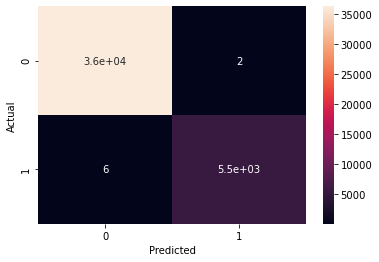

In [16]:
#matriz de confucision para random forest
import seaborn as sn
confusion_matrix = pd.crosstab(y_test, Y_prediction_rf, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()

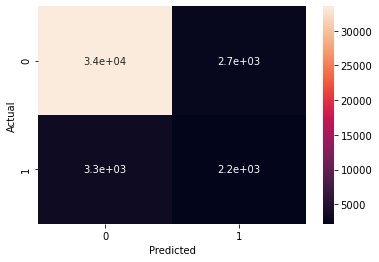

In [17]:
#matriz de confucision para regresion logistica
import seaborn as sn
confusion_matrix = pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()

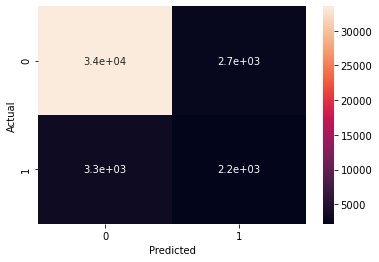

In [18]:
#matriz de confucision para knn
import seaborn as sn
confusion_matrix = pd.crosstab(y_test, Y_pred_k, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()